In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("card_transdata.csv")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

FileNotFoundError: ignored

# New Section

print histogram of the data

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
(100000, 8)
       distance_from_home  distance_from_last_transaction  \
count       100000.000000                   100000.000000   
mean            26.546540                        4.989437   
std             61.970342                       20.259870   
min              0.036085                        0.000319   
25%              3.907814                        0.298540   
50%             10.014846                        1.000405   
75%             25.789248                        3.363713   
max           3986.278366                     1235.861381   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   100000.000000    100000.000000  100000.000000   
mean                         1.827465         0.883050       0.348770   
std      

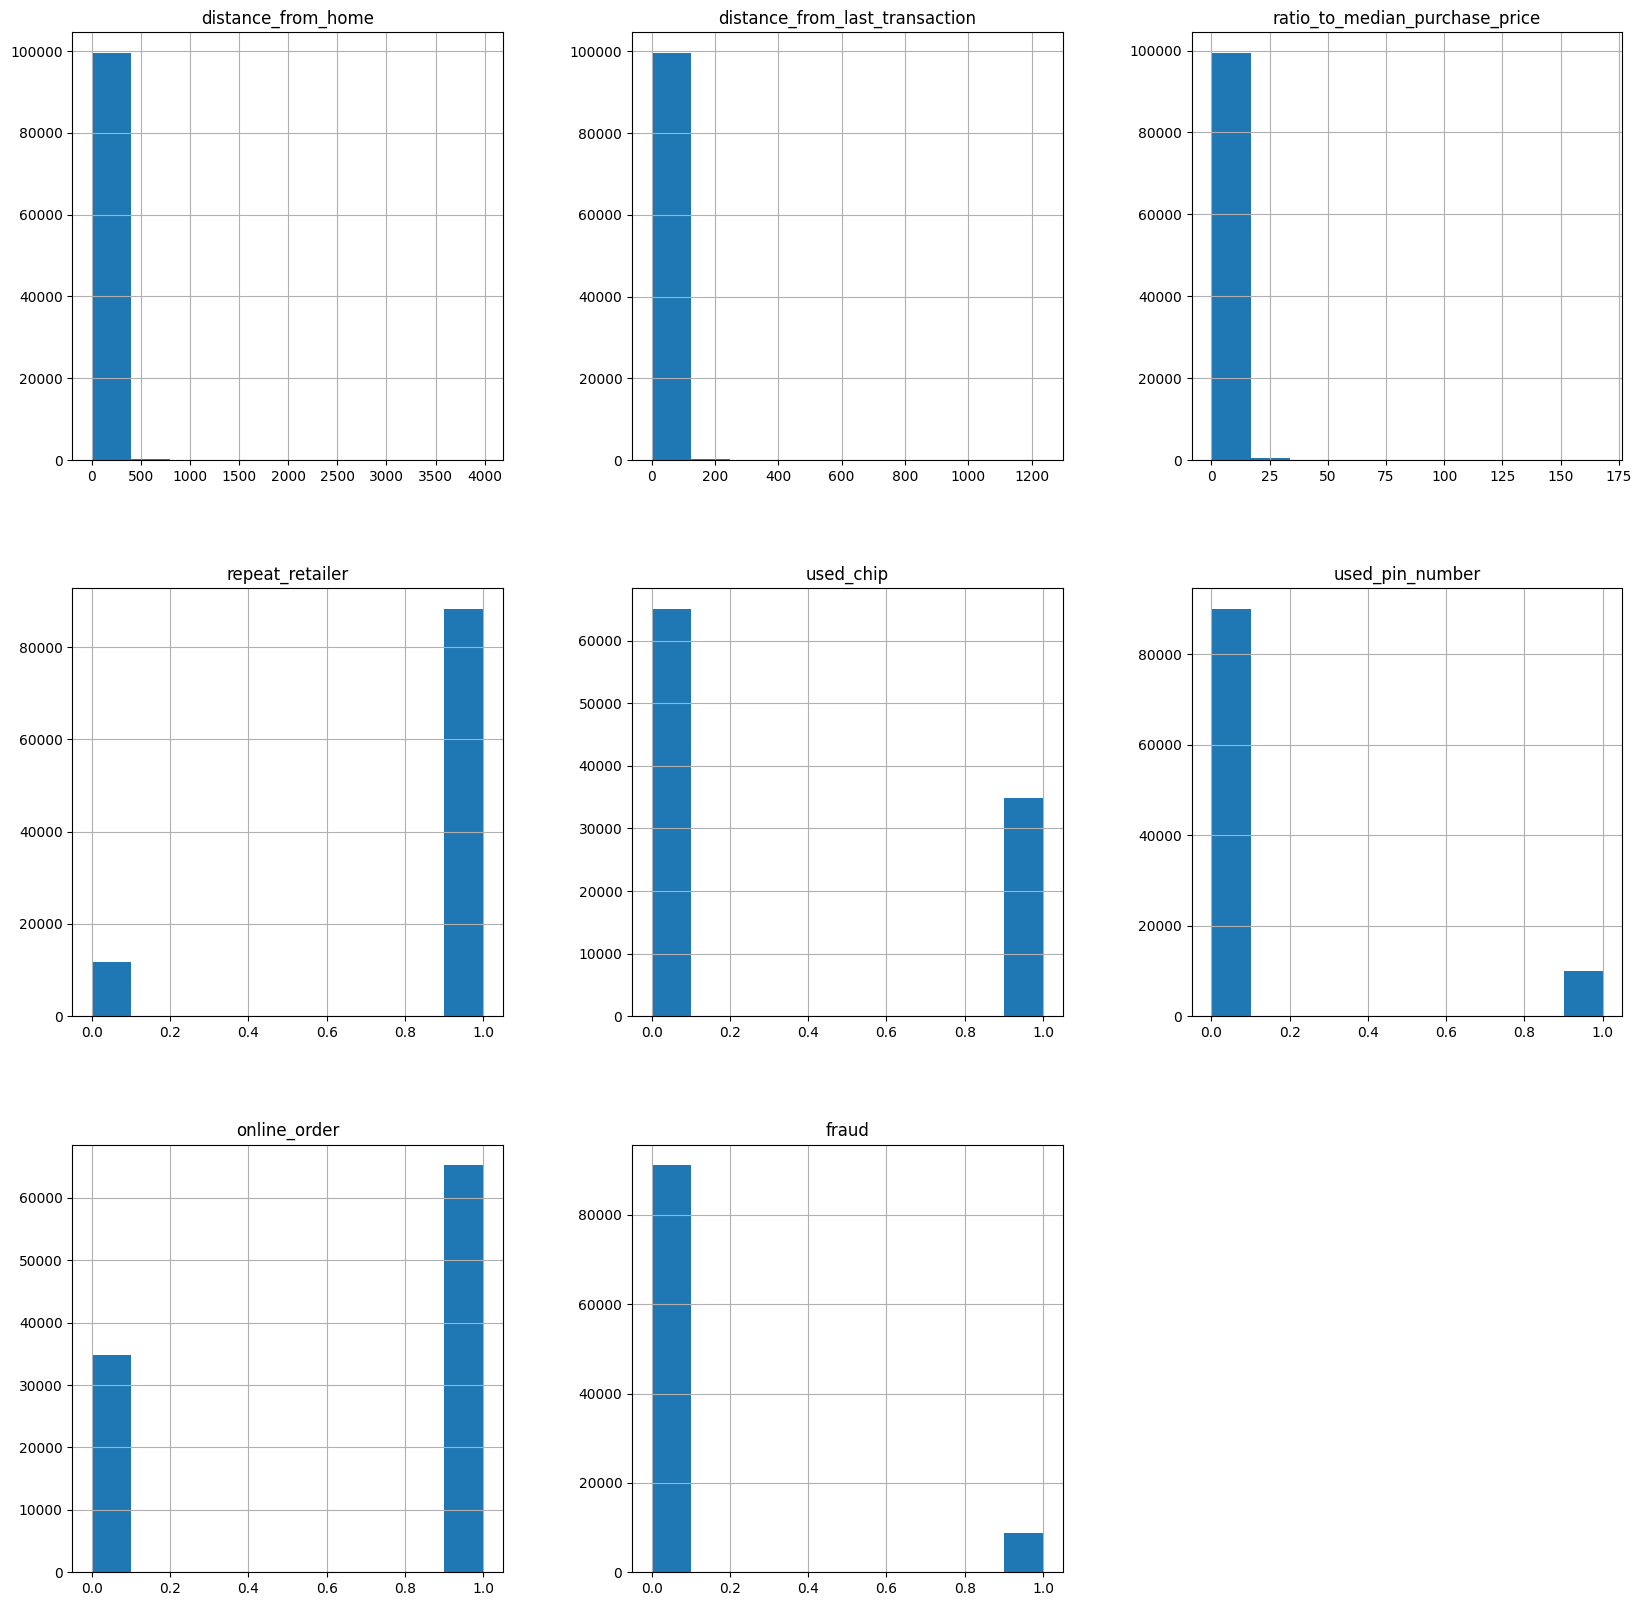

In [ ]:

print(data.columns)

data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

data.hist(figsize = (20, 20))
plt.show()

Heat map of the data

<Axes: >

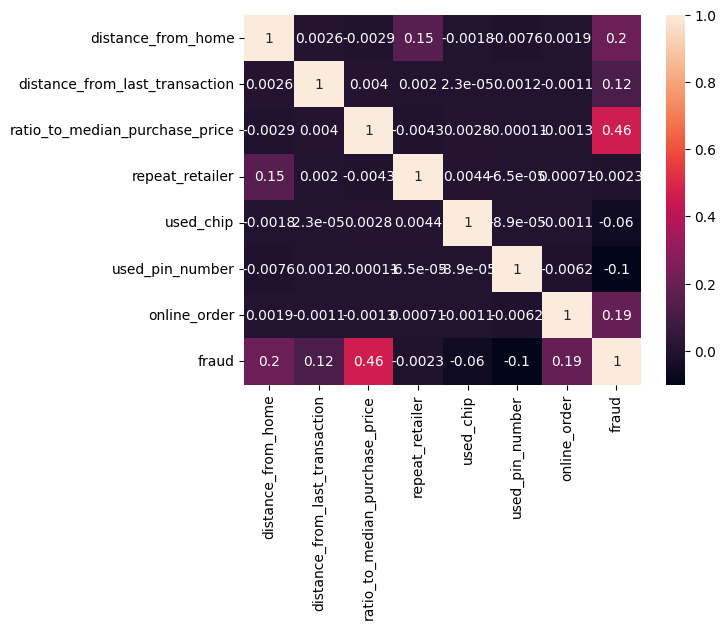

In [ ]:
sns.heatmap(data.corr(), annot=True)

Linear regresion model

Note: again does a range of numbers not just a boolean so not the best fit

In [ ]:
model = LinearRegression()
X = data[['ratio_to_median_purchase_price', 'distance_from_home', 'online_order', 'distance_from_last_transaction']]
Y = data.fraud
train_X, test_X, train_y, test_y = train_test_split(X, Y)
model.fit(train_X, train_y)
predictions = model.predict( test_X )
mean_absolute_error(test_y, predictions)

0.1351737135793418

<Axes: title={'center': 'LinearRegression'}, xlabel='fraud', ylabel='predict'>

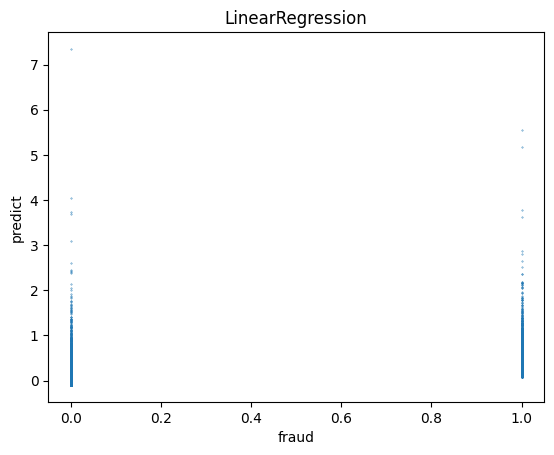

In [ ]:
data['predict'] = model.predict( X )
data.plot.scatter(x = 'fraud', y = 'predict', s = 0.1, title = 'LinearRegression')

RandomForestRegressorModel

Note: this operates on a boolean ,etric so it fits our data significantly better



In [ ]:
model = RandomForestClassifier()
X = data[['ratio_to_median_purchase_price', 'distance_from_home', 'online_order', 'distance_from_last_transaction']]
Y = data.fraud
train_X, test_X, train_y, test_y = train_test_split(X, Y)
model.fit(train_X, train_y)
predictions = model.predict( test_X )
mean_absolute_error(test_y, predictions)


0.027

<Axes: title={'center': 'RandomForestClassifier'}, xlabel='fraud', ylabel='predict'>

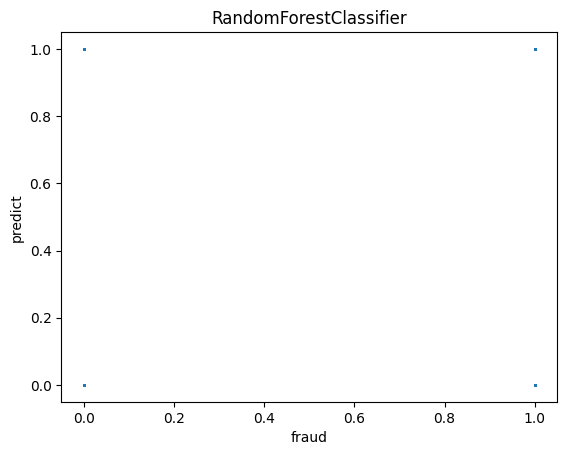

In [ ]:
data['predict'] = model.predict( X )
data.plot.scatter(x = 'fraud', y = 'predict', s = 0.1, title = 'RandomForestClassifier')

accuracy

In [ ]:
import numpy as np
np.set_printoptions(threshold= np.inf)

predicted_probabilities = model.predict_proba(test_X)

# predicted_classes = (predicted_probabilities[:, 1] >= 0.06).astype(int)
# print(predicted_probabilities[:, 1])
# print(predicted_classes)
# Compute accuracy score
accuracy = accuracy_score(test_y, predicted_classes)
print("Accuracy:", accuracy)

Accuracy: 0.97608
